In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('/content/Breast_cancer_data.csv')
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
## 0 - benign 1 - malignant

X = df.drop(['diagnosis'],axis=1) #feature data
y = df.diagnosis                  #output data  

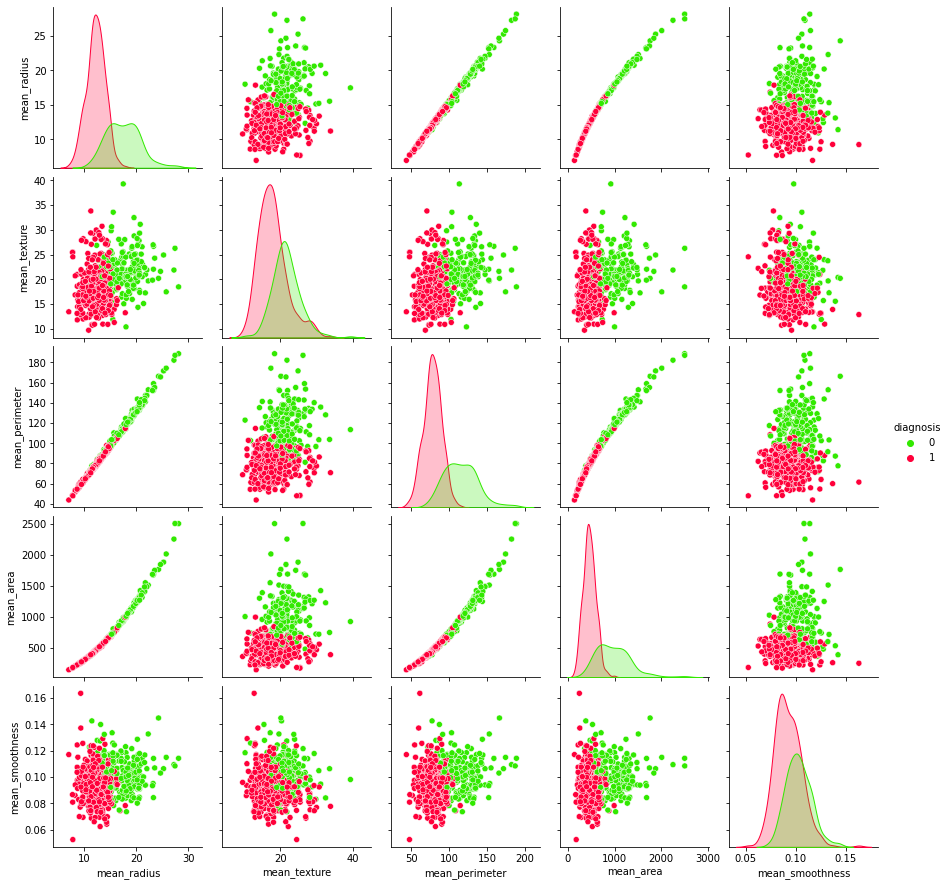

In [ ]:
plot = sns.pairplot(df, hue='diagnosis',palette='prism')

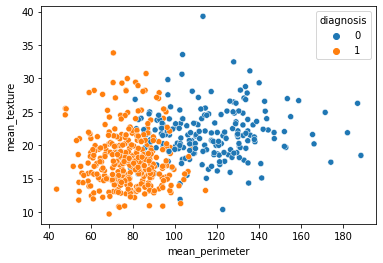

In [ ]:
viz = sns.scatterplot(x='mean_perimeter',y='mean_texture',data=df,hue='diagnosis')

In [ ]:
X_train = StandardScaler().fit(X_train)
X_test = StandardScaler().fit(X_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 5)
(114, 5)
(455,)
(114,)


In [ ]:
##Logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)
print("Evaluating logsitic regression###########\n")
print(lr)

Evaluating logsitic regression###########

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#predict_accuracy
pred = lr.predict(X_test)
print(y_test.shape)
print(pred.shape)

(114,)
(114,)


In [ ]:
from sklearn.metrics import accuracy_score
print("*****Accuracy Score********\n")
print(accuracy_score(y_test,pred))

*****Accuracy Score********

0.9473684210526315


In [ ]:
##neural network##
import keras
from keras.models import*
from keras.layers import*

In [ ]:
##model
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 46.9622 - accuracy: 0.3714
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 42.9243 - accuracy: 0.3714
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 39.2155 - accuracy: 0.3714
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 35.6965 - accuracy: 0.3714
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 32.3032 - accuracy: 0.3714
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 23.7925 - accuracy: 0.3714
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 11.4027 - accuracy: 0.3736
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 1.6586 - accuracy: 0.6527
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.8298 - accuracy: 0.7780
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8220
Epoch 11/50


In [ ]:
res = model.evaluate(X_test,y_test,verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9298


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
import time

In [ ]:
#user input sample
inp = np.array([15,10,133.8,1002,0.1000])
inpt = np.expand_dims(inp,axis=0)
pred = model.predict((inpt))
if pred > 0.5 :
  pred = "Malignant"
else :
  pred = "Benign"

print("****Diagnosis in process******")
time.sleep(3)
print("The tumor is:", pred)

****Diagnosis in process******
The tumor is: Malignant


In [ ]:
#console inputs

features = []
feature_values = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
print("Enter feature values")
for i in range(5):
  x = features.append(float(input(f"Enter the {feature_values[i]} values")))

#print(f'{features} are the inputs')

inp = np.array(features)
inpt = np.expand_dims(inp,axis=0)
predict = model.predict(inpt)

if predict > 0.5 :
  predict = "Malignant"
else :
  predict = "Benign"

print("****Diagnosis in process******")
time.sleep(3)
print("The tumor is:", predict)


Enter feature values
Enter the mean_radius values15
Enter the mean_texture values10
Enter the mean_perimeter values133.8
Enter the mean_area values1001.0
Enter the mean_smoothness values0.1184
****Diagnosis in process******
The tumor is: Malignant
